In [ ]:
!nvidia-smi

Sun Dec  1 15:11:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Get Data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QuwzZuvxyCQ2yTPnfDV9")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:00<00:00, 5865.55it/s]


In [ ]:
!pip install ultralytics

from IPython import display
import ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 23.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os

HOME =os.getcwd()
HOME

'/content'

## Train on custom dataset

In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!yolo task=segment mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml  epochs=60 imgsz=640 plots=True

100% 19.7M/19.7M [00:00<00:00, 134MB/s] 
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/BRAIN-TUMOR-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	 train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1733066573.9ff5ae7e46fe.3246.0  train_batch1850.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1851.jpg  weights
labels.jpg					    train_batch1852.jpg


## Evaluation

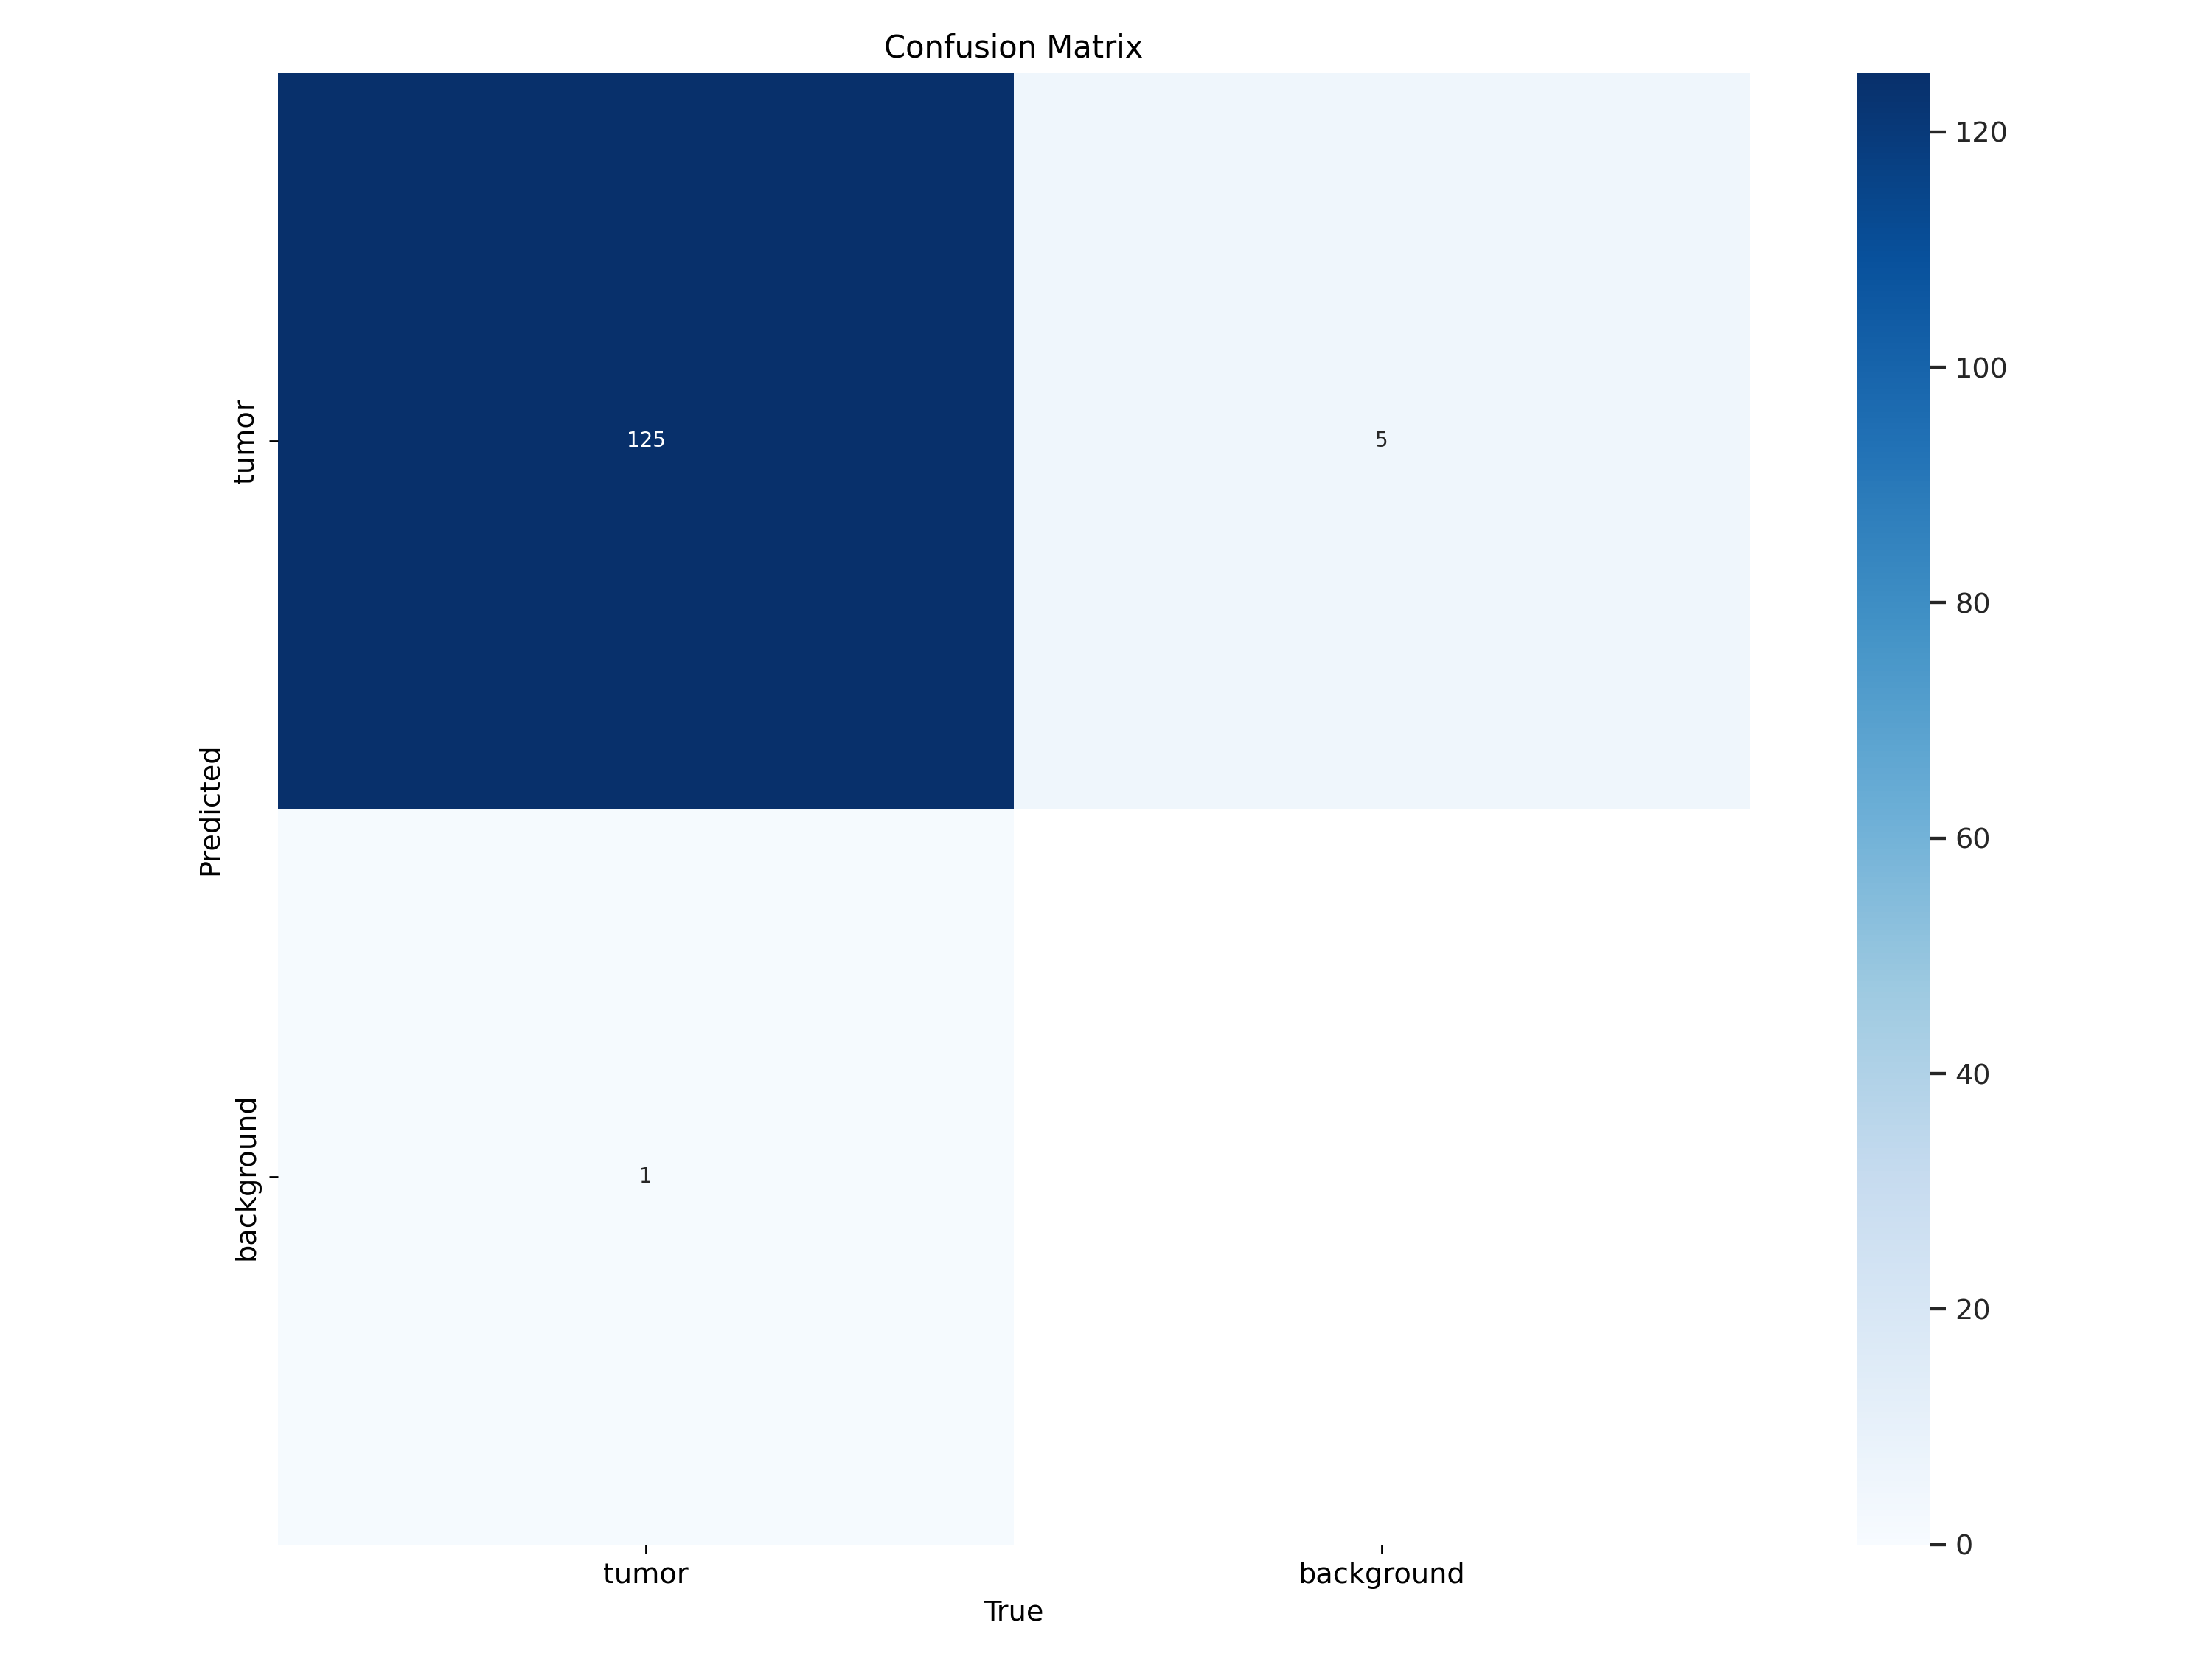

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=800)

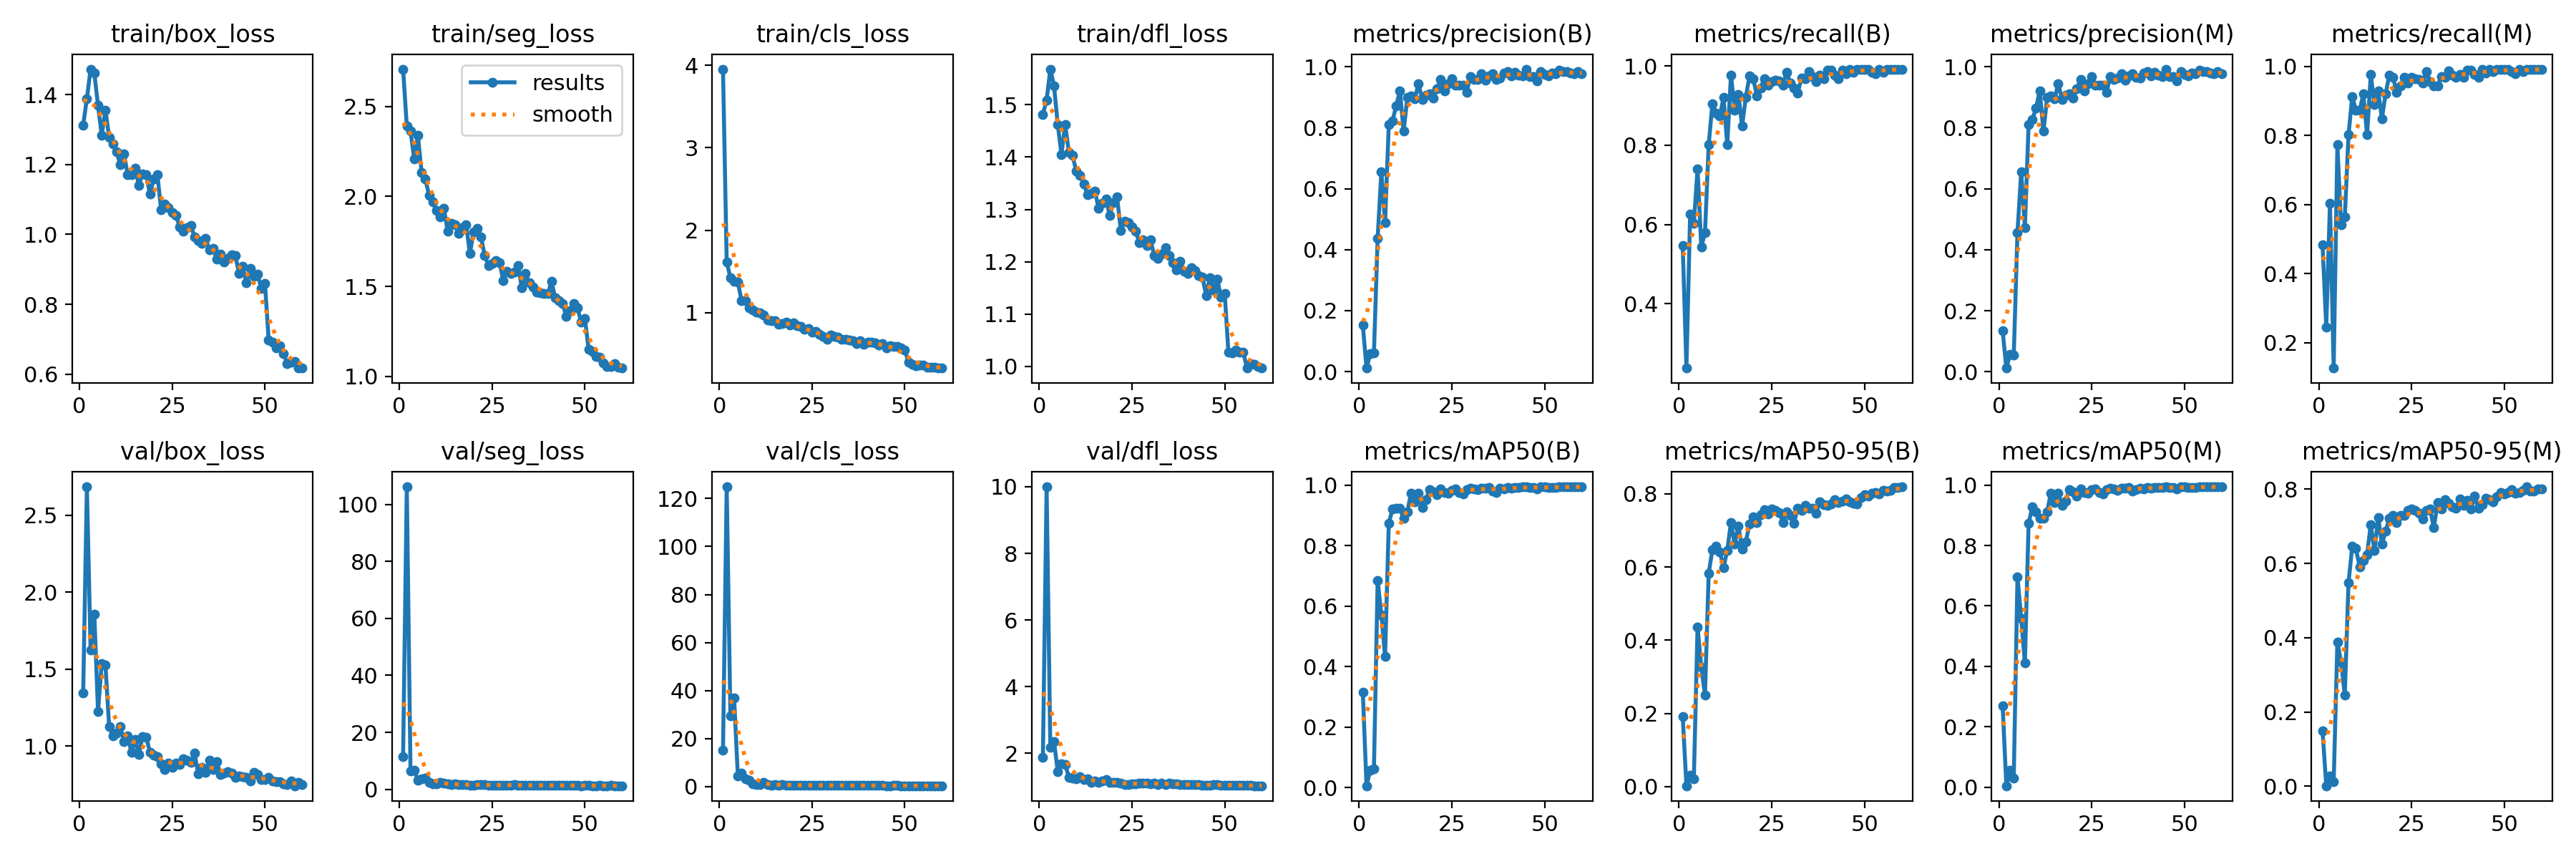

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/results.png', width=800)

## Validation

In [ ]:
!yolo task=segment mode=val model=/{HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/BRAIN-TUMOR-1/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100% 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.71it/s]
                   all        123        126      0.976      0.992      0.994      0.816      0.976      0.992      0.994      0.801
Speed: 2.7ms preprocess, 12.7ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference

In [ ]:
!yolo task=segment mode=predict model=/{HOME}/runs/segment/train/weights/best.pt conf=.3 source={dataset.location}/test/images

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/128 /content/BRAIN-TUMOR-1/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg: 640x640 1 tumor, 20.3ms
image 2/128 /content/BRAIN-TUMOR-1/test/images/y172_jpg.rf.1de5e52261087615739339dfec693873.jpg: 640x640 1 tumor, 20.2ms
image 3/128 /content/BRAIN-TUMOR-1/test/images/y17_jpg.rf.00e73d21eb12c3ad8e3cb3b5a87805b8.jpg: 640x640 1 tumor, 20.1ms
image 4/128 /content/BRAIN-TUMOR-1/test/images/y192_jpg.rf.d4ef756fbf9c0fd35dc411b61f8aa184.jpg: 640x640 1 tumor, 20.1ms
image 5/128 /content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.898204dcdfcff60fff55f3734567e205.jpg: 640x640 1 tumor, 20.1ms
image 6/128 /content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.d75ad28b5fae3f14d696dfc98ef3d326.jpg: 640x640 1 tumor, 20.1ms
image 7/128 /content/BRAIN-TUMOR-1/test/images/y196_jpg.rf.cb679791b2f16798391d0a24d51aca4c.jpg: 640x64

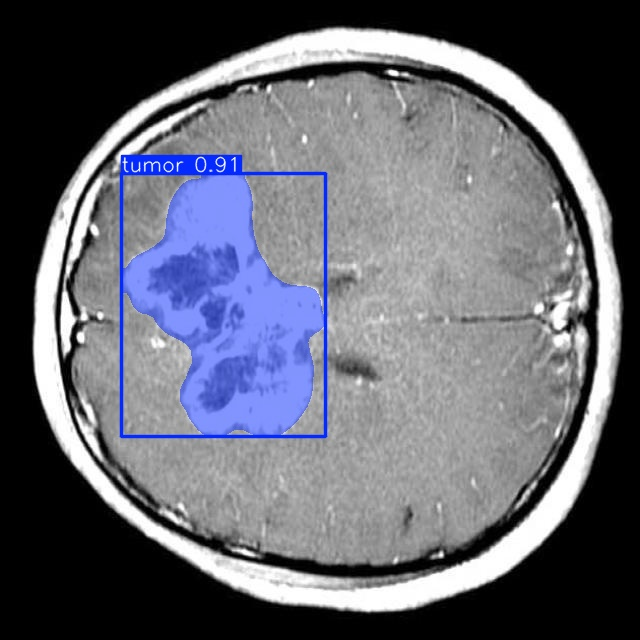

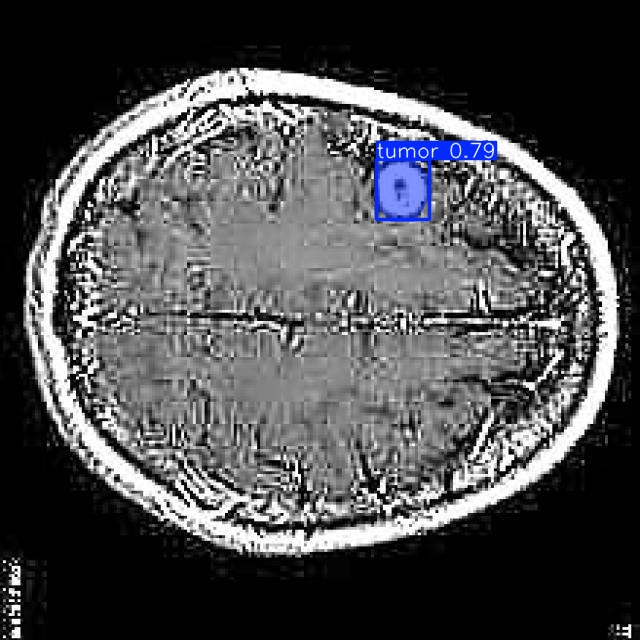

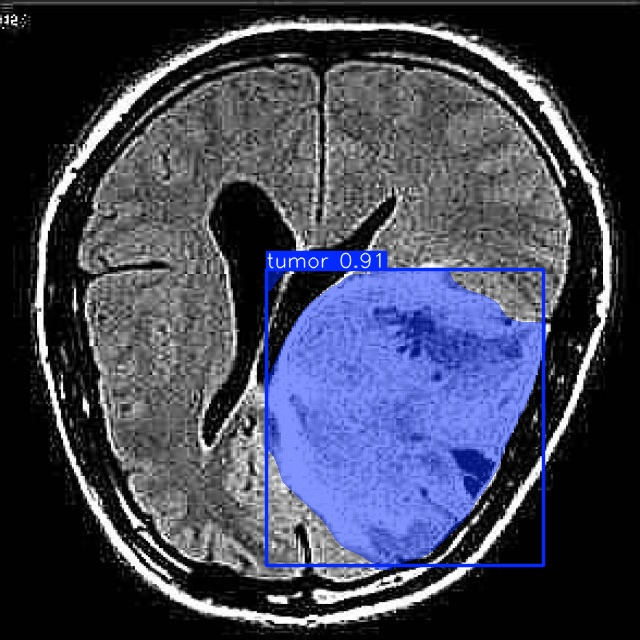

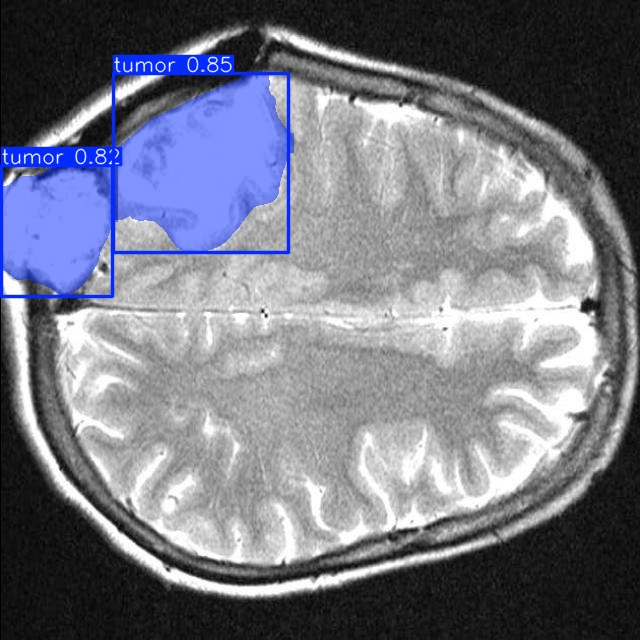

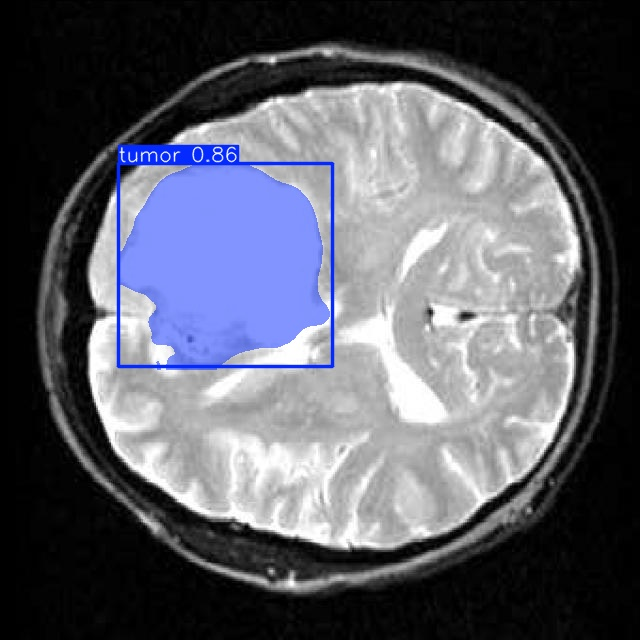

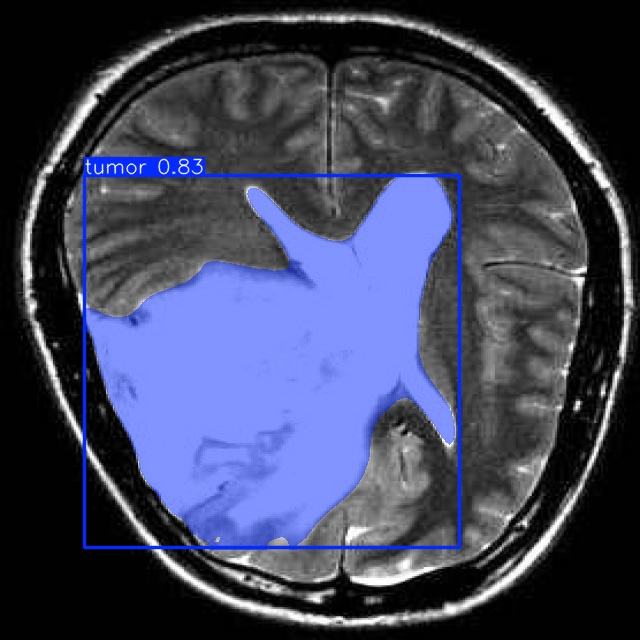

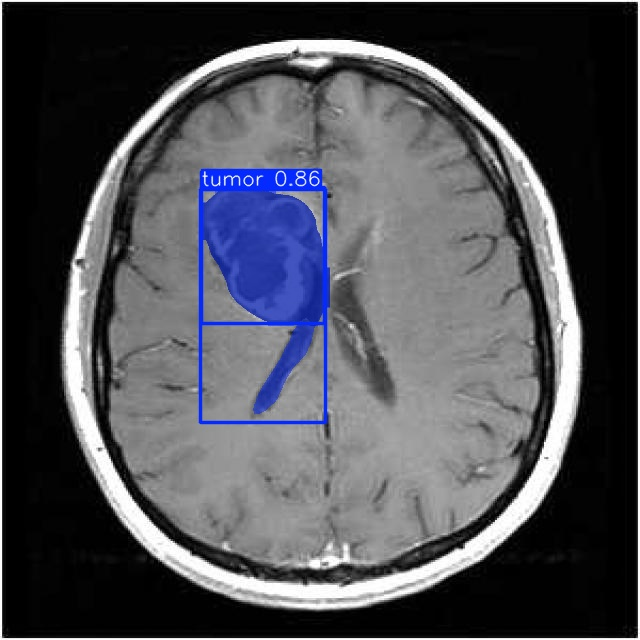

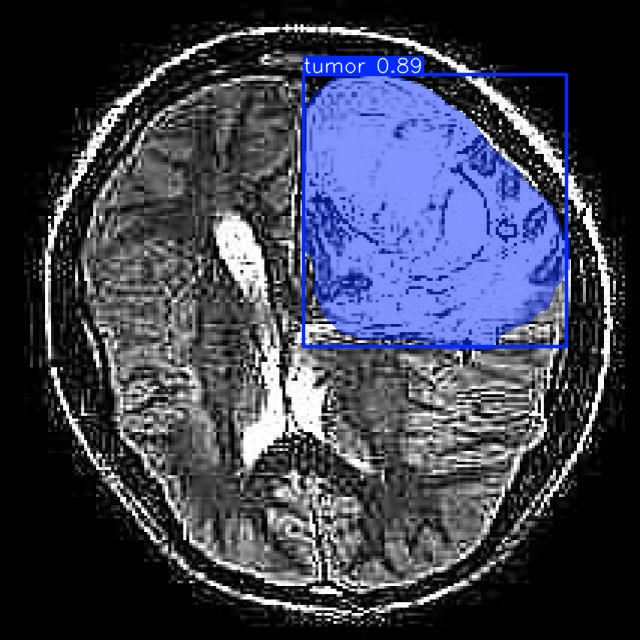

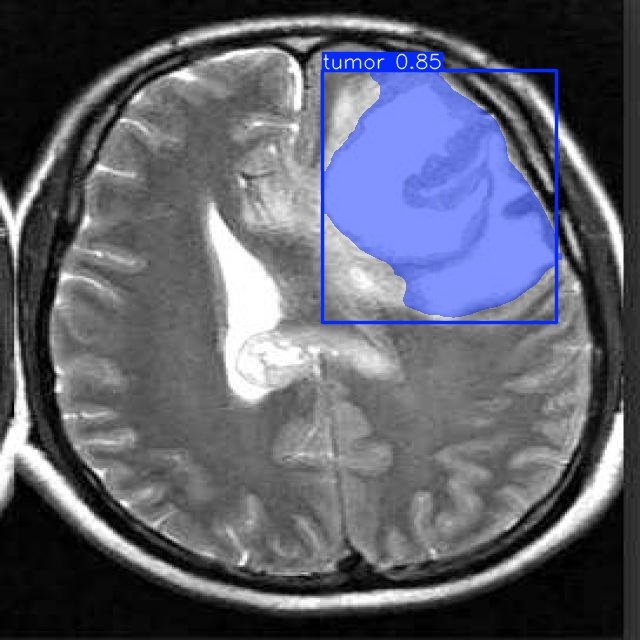

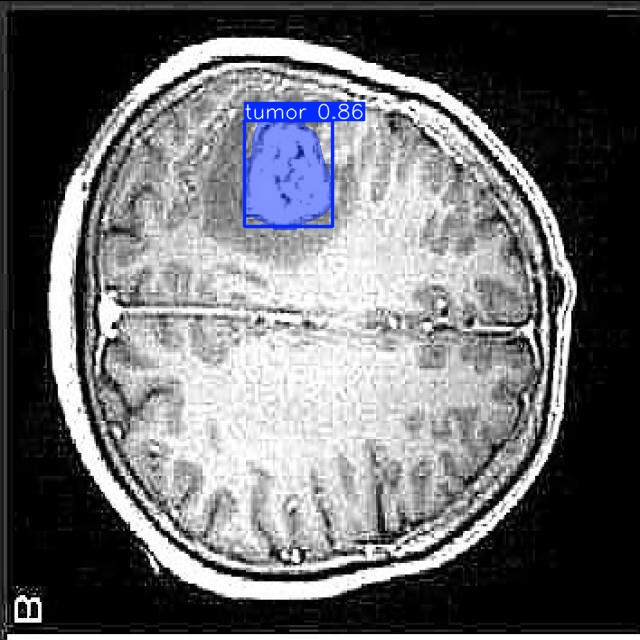

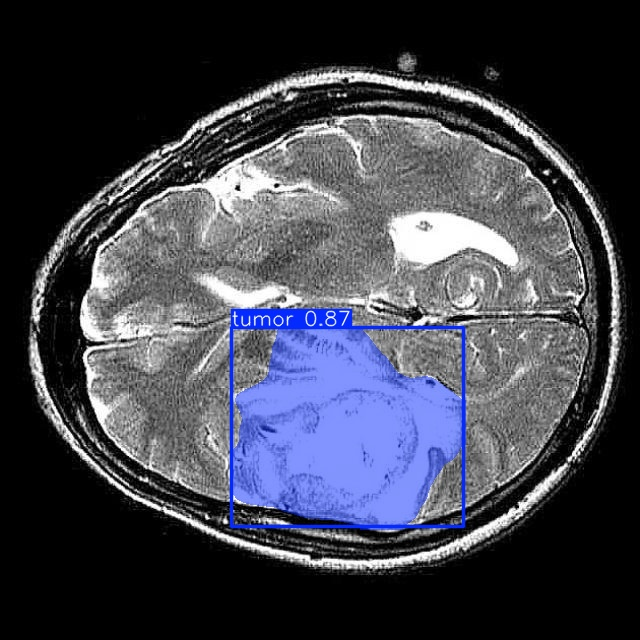

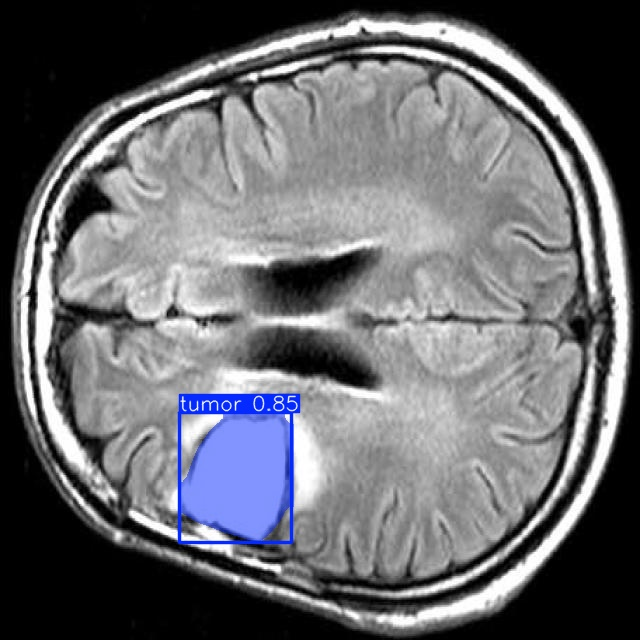

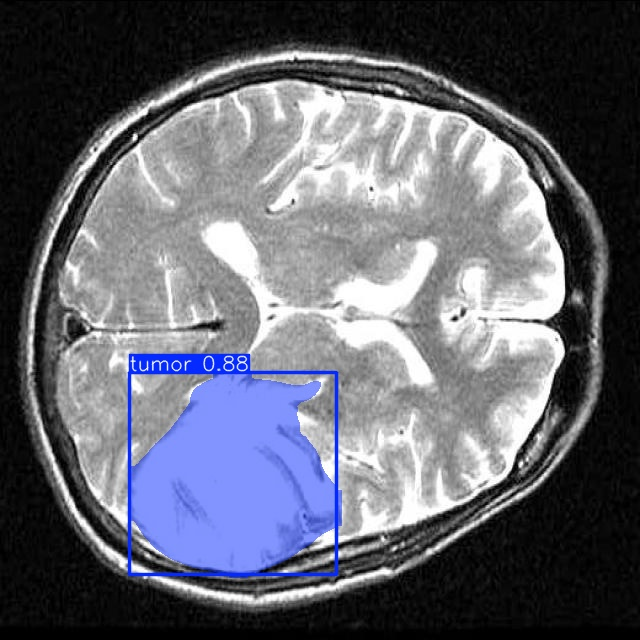

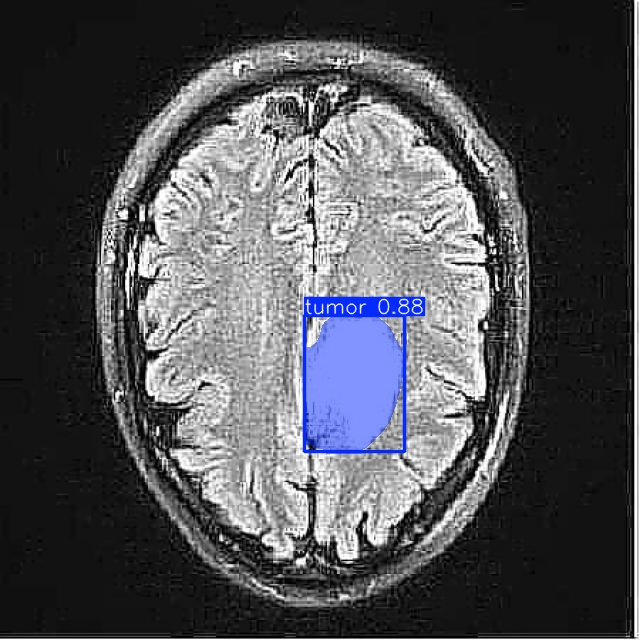

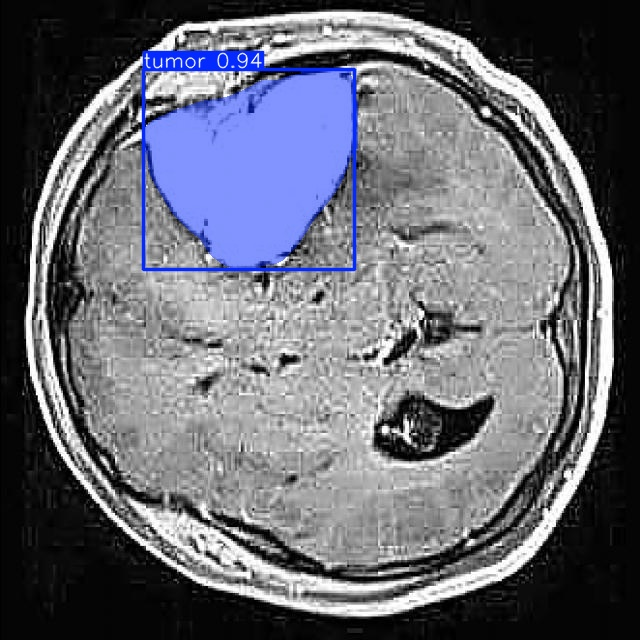

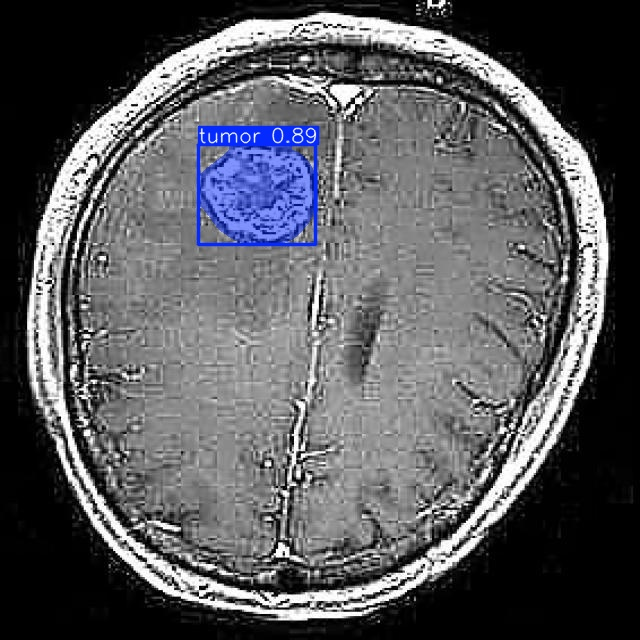

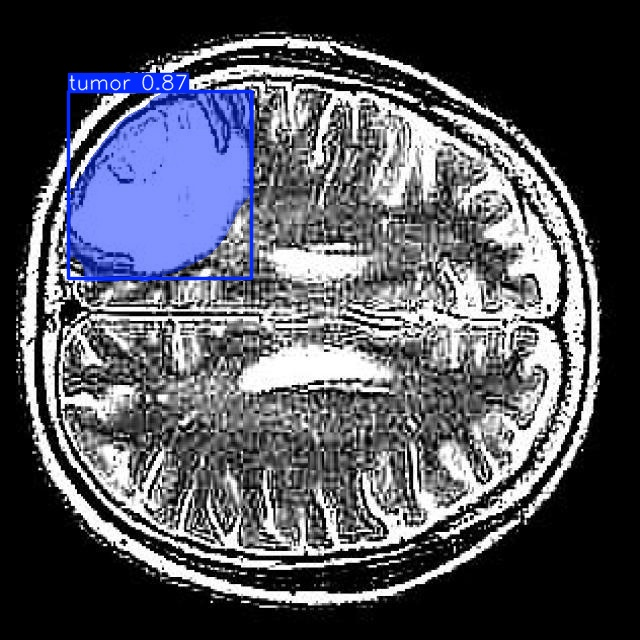

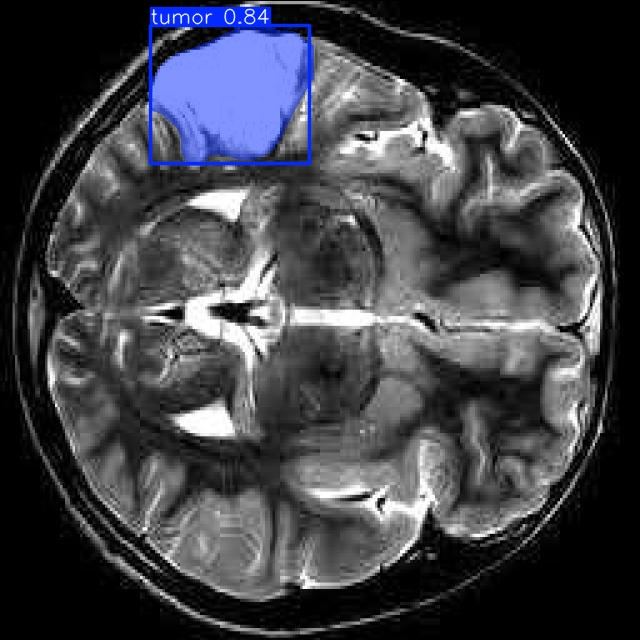

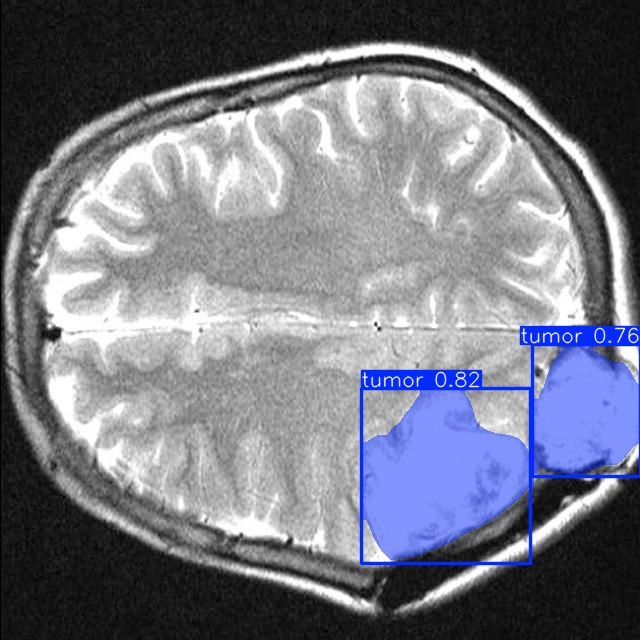

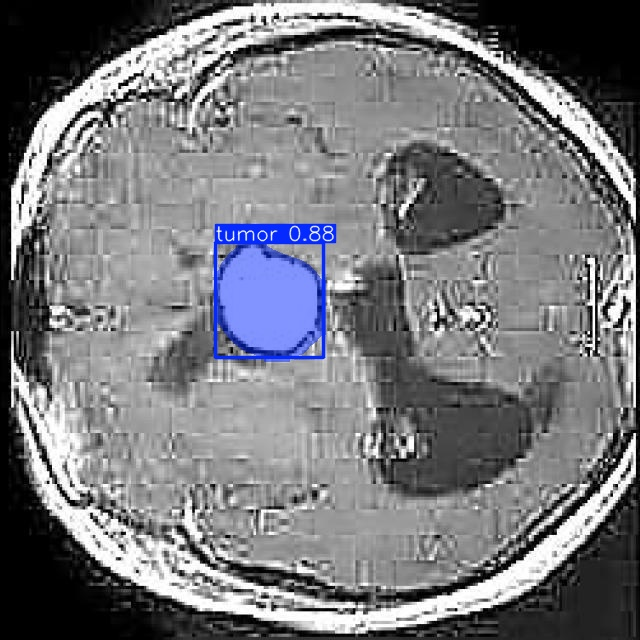

In [ ]:
import glob
from IPython.display import display, Image


for img_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
    display(Image(filename=img_path, width=600))
    print('\n')